Due date: July 29, 2022​

Goal​

Design and implement your ideas using Apache Spark​

Figure out how to store the tweets in Spark SQL​

Write interesting analytic queries to explore and understand the data – at least 10 queries (must be different conceptually)​

Develop interesting visualizations (e.g., pie chart, heat map, bar graphs)​

What to submit?​

A report describing the design and implementation of your tool/software along with details on testing​
Your code​
Video explanation of your code and outputs 

https://towardsdatascience.com/pyspark-and-sparksql-basics-6cb4bf967e53

https://medium.com/@brijeshgzp05/how-to-visualize-a-dataset-in-apache-spark-pyspark-a32abd8ca4f4

https://www.analyticsvidhya.com/blog/2020/11/a-must-read-guide-on-how-to-work-with-pyspark-on-google-colab-for-data-scientists/

# Configuration: Do not skip any steps in this section.

In [ ]:
# install pyspark and find spark
!pip install findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# I also tried to downgrade to 2.4.7, which worked, if I remember to restart the run time after downgrading.
#!pip install pyspark==2.3.2
#!pip install pyspark==2.4.7 # Yes, this version seems to work better than the others I tried.
!pip install pyspark==2.4.8

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://www-us.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz #another option

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
#!tar xf spark-3.0.1-bin-hadoop2.7.tgz #another option

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
#os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7" #another option

^C


In [ ]:
#check your java version. Java 8 is more likely to be compatable with .toPandas()
!java -version

openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [ ]:
#install java 8
!sudo apt install openjdk-8-jdk

#configure java 8
!sudo update-alternatives --config java

#reset home to java 8
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java"

# Do not forget to restart the runtime

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jre x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jre x11-utils
0 upgraded, 13 newly installed, 0 to remove and 49 not upgraded.
Need to get 6,989 kB of archives.
After this operation, 20.0 MB of additional disk space will be used.
Get

Inisitiate spark

In [ ]:
import findspark
findspark.init() 

In [ ]:
findspark.find()

'/usr/local/lib/python3.7/dist-packages/pyspark'

Entry Points:
Every Spark Application needs an entry point that allows it to communicate with data sources and perform certain operations such as reading and writing data. In Spark 1.x, three entry points were introduced: SparkContext, SQLContext and HiveContext. Since Spark 2.x, a new entry point called SparkSession has been introduced that essentially combined all functionalities available in the three aforementioned contexts. Note that all contexts are still available even in newest Spark releases, mostly for backward compatibility purposes.
https://towardsdatascience.com/sparksession-vs-sparkcontext-vs-sqlcontext-vs-hivecontext-741d50c9486a


# Conf Option 1: Spark Session (Recommended). 

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2022-07-27 12:02:44--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  6.48MB/s    in 2.0s    

2022-07-27 12:02:46 (6.48 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
{"tunnels":[],"uri":"/api/tunnels"}


# Conf Option 2: Spark Context (Backward Compatability)

Configuration for Map and Reduce

In [ ]:
from pyspark.conf import SparkConf
from pyspark.context import SparkContext

In [ ]:
conf = SparkConf().setAppName("SparkWordCount").setMaster('local')

In [ ]:
#If it does not work, make sure you restart the runtime.
import findspark
sc = SparkContext(conf=conf)

Configuration for .toPandas()

In [ ]:
!pip install pyarrow==8.0.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.3 MB 1.2 MB/s 
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 6.0.1
    Uninstalling pyarrow-6.0.1:
      Successfully uninstalled pyarrow-6.0.1


In [ ]:
from pyspark.sql import SQLContext

In [ ]:
import pyarrow

In [ ]:
conf = SparkConf().set("spark.sql.execution.arrow.pyspark.enabled", "true").setMaster('local')

In [ ]:
sqlContext = SQLContext(sc)

# Parallelizing-creating RDD in memory: Take two words from a list, and the list is already in memory

In [ ]:
input_file = ['I',"like",'you','you','see','me']

In [ ]:
sc.parallelize(input_file).cache().take(2)

['I', 'like']

# Referencing-creating RDD from an external storage system: Read from a txt file ( I think I am getting there)

In [ ]:
with open('input.txt', "w") as testFile:
  _=testFile.write('Hello World. This is my first try. I hope it works out.')
  testFile=sc.textFile('input.txt')
  #testFile.collect() # This line causes trouble.

In [ ]:
df=sc.textFile('urls.txt')

# Do not forget to turn off the run time when processing is done.

In [ ]:
spark.stop()#conf option 1

In [ ]:
sc.stop()#conf option 2

# Project 2 Step 1: Store the tweets in Spark SQL​

In [ ]:
import pandas as pd

In [ ]:
# https://spark.apache.org/docs/latest/sql-data-sources-csv.html
df = spark.read.csv("tweets_10k.csv", header=True, inferSchema=True, multiLine=True) # conf ption1
#df = sqlContext.read.csv("tweets_10k.csv", header='True', sep=',',inferSchema=False, multiLine=True) # conf option2

In [ ]:
df.show()

+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|
+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|RT @JoeBiden: The...|2022-07-15 20:42:...|                  []|                  []|   Twitter for iPad|User(_api=<tweepy...|
|@Jacob_Rees_Mogg ...|2022-07-15 20:42:...|                  []|                  []|    Twitter Web App|User(_api=<tweepy...|
|RT @Sbh08Mae: @Re...|2022-07-15 20:42:...|[{'text': 'WA08',...|                  []|    Twitter Web App|User(_api=<tweepy...|
|RT @JoeBiden: The...|2022-07-15 20:42:...|                  []|                  []|   Twitter for iPad|User(_api=<tweepy...|
|@RussianEmbassy @...|2022-07-15 20:42:...|                  []|                  []|    Twitter Web App|User(_api=<tweepy...|
|RT @taykuy: That ...|2022-07-15 20:42:...|                  []|                  []| Twitter for iPhone|User

In [ ]:
df.printSchema()

root
 |-- tweet: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- urls: string (nullable = true)
 |-- source: string (nullable = true)
: string (nullable = true)



Here I am testing the configuration for .toPandas(). It works. But, this is not recommended since only a slice of a pySpark dataset can be converted to Panda dataframe. The entire pySpark dataset is often too large for Panda dataframe.

In [ ]:
panda_df=df.toPandas()

In [ ]:
panda_df.head()

,tweet,created_at,hashtags,urls,source,user\r
0,RT @JoeBiden: The price of oil is down about 2...,2022-07-15 20:42:37+00:00,[],[],Twitter for iPad,User(_api=<tweepy.api.API object at 0x000001B0...
1,@Jacob_Rees_Mogg I believe the price for gas i...,2022-07-15 20:42:33+00:00,[],[],Twitter Web App,User(_api=<tweepy.api.API object at 0x000001B0...
2,RT @Sbh08Mae: @RepKimSchrier knows gas &amp; o...,2022-07-15 20:42:31+00:00,"[{'text': 'WA08', 'indices': [107, 112]}]",[],Twitter Web App,User(_api=<tweepy.api.API object at 0x000001B0...
3,RT @JoeBiden: The price of oil is down about 2...,2022-07-15 20:42:31+00:00,[],[],Twitter for iPad,User(_api=<tweepy.api.API object at 0x000001B0...
4,@RussianEmbassy @BBCRadio4 @mfa_russia @BBCWor...,2022-07-15 20:42:27+00:00,[],[],Twitter Web App,User(_api=<tweepy.api.API object at 0x000001B0...


In [ ]:
panda_df.shape

(8558, 6)

In [ ]:
# select tweets and save in a SparkSQL dataframe
tweets=df.select("tweet")

In [ ]:
tweets.show()

+--------------------+
|               tweet|
+--------------------+
|RT @JoeBiden: The...|
|@Jacob_Rees_Mogg ...|
|RT @Sbh08Mae: @Re...|
|RT @JoeBiden: The...|
|@RussianEmbassy @...|
|RT @taykuy: That ...|
|RT @JoeBiden: The...|
|The price of oil ...|
|RT @CLBunny1225: ...|
|RT @brainclubnft:...|
|RT @JoeBiden: The...|
|RT @bint72: To so...|
|RT @WHCOS: Today ...|
|RT @ActionDemocra...|
|@zerohedge You ta...|
|RT @JoeBiden: The...|
|RT @JoeBiden: The...|
|@unusual_whales I...|
|RT @JoeBiden: The...|
|RT @AngliaTools: ...|
+--------------------+
only showing top 20 rows



In [ ]:
panda_tweets=tweets.toPandas()
panda_tweets.head()

,tweet
0,RT @JoeBiden: The price of oil is down about 2...
1,@Jacob_Rees_Mogg I believe the price for gas i...
2,RT @Sbh08Mae: @RepKimSchrier knows gas &amp; o...
3,RT @JoeBiden: The price of oil is down about 2...
4,@RussianEmbassy @BBCRadio4 @mfa_russia @BBCWor...


# Project 2 Step 2: Write interesting analytic queries to explore and understand the data – at least 10 queries (must be different conceptually)​

In [ ]:
from pyspark.sql.functions import countDistinct

Query: Retweets @JoeBiden

In [ ]:
# Show tweet is TRUE if tweet has " @JoeBiden: " in tweets
JoeBiden=df.select("tweet",df.tweet.like("% @JoeBiden: %"))
JoeBiden.show(15)

+--------------------+-------------------------+
|               tweet|tweet LIKE % @JoeBiden: %|
+--------------------+-------------------------+
|RT @JoeBiden: The...|                     true|
|@Jacob_Rees_Mogg ...|                    false|
|RT @Sbh08Mae: @Re...|                    false|
|RT @JoeBiden: The...|                     true|
|@RussianEmbassy @...|                    false|
|RT @taykuy: That ...|                    false|
|RT @JoeBiden: The...|                     true|
|The price of oil ...|                    false|
|RT @CLBunny1225: ...|                    false|
|RT @brainclubnft:...|                    false|
|RT @JoeBiden: The...|                     true|
|RT @bint72: To so...|                    false|
|RT @WHCOS: Today ...|                    false|
|RT @ActionDemocra...|                    false|
|@zerohedge You ta...|                    false|
+--------------------+-------------------------+
only showing top 15 rows



In [ ]:
JoeBiden.groupBy('tweet LIKE % @JoeBiden: %').count().show()

+-------------------------+-----+
|tweet LIKE % @JoeBiden: %|count|
+-------------------------+-----+
|                     true| 2230|
|                    false| 6328|
+-------------------------+-----+



In [ ]:
panda_JoeBiden=JoeBiden.toPandas()
panda_JoeBiden.head()

,tweet,tweet LIKE % @JoeBiden: %
0,RT @JoeBiden: The price of oil is down about 2...,True
1,@Jacob_Rees_Mogg I believe the price for gas i...,False
2,RT @Sbh08Mae: @RepKimSchrier knows gas &amp; o...,False
3,RT @JoeBiden: The price of oil is down about 2...,True
4,@RussianEmbassy @BBCRadio4 @mfa_russia @BBCWor...,False


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

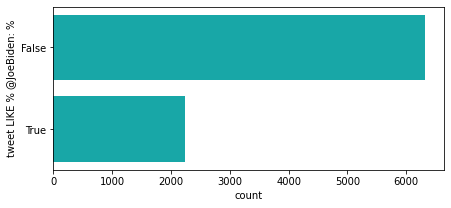

In [ ]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="tweet LIKE % @JoeBiden: %", data=panda_JoeBiden, color="c")

Query: Retweets vs. tweets

In [ ]:
RT=df.select("tweet",df.tweet.startswith('RT'))
RT.show()

+--------------------+---------------------+
|               tweet|startswith(tweet, RT)|
+--------------------+---------------------+
|RT @JoeBiden: The...|                 true|
|@Jacob_Rees_Mogg ...|                false|
|RT @Sbh08Mae: @Re...|                 true|
|RT @JoeBiden: The...|                 true|
|@RussianEmbassy @...|                false|
|RT @taykuy: That ...|                 true|
|RT @JoeBiden: The...|                 true|
|The price of oil ...|                false|
|RT @CLBunny1225: ...|                 true|
|RT @brainclubnft:...|                 true|
|RT @JoeBiden: The...|                 true|
|RT @bint72: To so...|                 true|
|RT @WHCOS: Today ...|                 true|
|RT @ActionDemocra...|                 true|
|@zerohedge You ta...|                false|
|RT @JoeBiden: The...|                 true|
|RT @JoeBiden: The...|                 true|
|@unusual_whales I...|                false|
|RT @JoeBiden: The...|                 true|
|RT @Angli

In [ ]:
RT.groupBy('startswith(tweet, RT)').count().show()

+---------------------+-----+
|startswith(tweet, RT)|count|
+---------------------+-----+
|                 true| 6674|
|                false| 1884|
+---------------------+-----+



In [ ]:
pandas_RT=RT.toPandas()
pandas_RT.head()

,tweet,"startswith(tweet, RT)"
0,RT @JoeBiden: The price of oil is down about 2...,True
1,@Jacob_Rees_Mogg I believe the price for gas i...,False
2,RT @Sbh08Mae: @RepKimSchrier knows gas &amp; o...,True
3,RT @JoeBiden: The price of oil is down about 2...,True
4,@RussianEmbassy @BBCRadio4 @mfa_russia @BBCWor...,False


Query: Tweets from iPad

In [ ]:
source=df.select('source',df.source.like("%iPad%"))
source.show()

+-------------------+------------------+
|             source|source LIKE %iPad%|
+-------------------+------------------+
|   Twitter for iPad|              true|
|    Twitter Web App|             false|
|    Twitter Web App|             false|
|   Twitter for iPad|              true|
|    Twitter Web App|             false|
| Twitter for iPhone|             false|
|Twitter for Android|             false|
|             Buffer|             false|
| Twitter for iPhone|             false|
| Twitter for iPhone|             false|
|Twitter for Android|             false|
|Twitter for Android|             false|
|    Twitter Web App|             false|
| Twitter for iPhone|             false|
|Twitter for Android|             false|
|    Twitter Web App|             false|
|    Twitter Web App|             false|
| Twitter for iPhone|             false|
| Twitter for iPhone|             false|
| Twitter for iPhone|             false|
+-------------------+------------------+
only showing top

In [ ]:
source.groupBy('source LIKE %iPad%').count().show()

+------------------+-----+
|source LIKE %iPad%|count|
+------------------+-----+
|              null|   76|
|              true|  534|
|             false| 7948|
+------------------+-----+



In [ ]:
pandas_source=source.toPandas()
pandas_source.head()

,source,source LIKE %iPad%
0,Twitter for iPad,True
1,Twitter Web App,False
2,Twitter Web App,False
3,Twitter for iPad,True
4,Twitter Web App,False


Visualize the proportions of tweets from diferent sources. We are trying to follow more common practice here, where a piece of a pySpark dataframe is extracted based on a timeframe, and analytics and visualizations are performed upon a fragment in Panda dataframe.

In [ ]:
# extract all tweets and retweets posted at and after 2022-07-15 20:29:55+00:00
all_dates=df[df.created_at>='2022-07-15 20:29:55+00:00']
all_dates.show(15)

+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|
+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|RT @JoeBiden: The...|2022-07-15 20:42:...|                  []|                  []|   Twitter for iPad|User(_api=<tweepy...|
|@Jacob_Rees_Mogg ...|2022-07-15 20:42:...|                  []|                  []|    Twitter Web App|User(_api=<tweepy...|
|RT @Sbh08Mae: @Re...|2022-07-15 20:42:...|[{'text': 'WA08',...|                  []|    Twitter Web App|User(_api=<tweepy...|
|RT @JoeBiden: The...|2022-07-15 20:42:...|                  []|                  []|   Twitter for iPad|User(_api=<tweepy...|
|@RussianEmbassy @...|2022-07-15 20:42:...|                  []|                  []|    Twitter Web App|User(_api=<tweepy...|
|RT @taykuy: That ...|2022-07-15 20:42:...|                  []|                  []| Twitter for iPhone|User

In [ ]:
tweets=all_dates.toPandas()

In [ ]:
tweets.head()

,tweet,created_at,hashtags,urls,source,user\r
0,RT @JoeBiden: The price of oil is down about 2...,2022-07-15 20:42:37+00:00,[],[],Twitter for iPad,User(_api=<tweepy.api.API object at 0x000001B0...
1,@Jacob_Rees_Mogg I believe the price for gas i...,2022-07-15 20:42:33+00:00,[],[],Twitter Web App,User(_api=<tweepy.api.API object at 0x000001B0...
2,RT @Sbh08Mae: @RepKimSchrier knows gas &amp; o...,2022-07-15 20:42:31+00:00,"[{'text': 'WA08', 'indices': [107, 112]}]",[],Twitter Web App,User(_api=<tweepy.api.API object at 0x000001B0...
3,RT @JoeBiden: The price of oil is down about 2...,2022-07-15 20:42:31+00:00,[],[],Twitter for iPad,User(_api=<tweepy.api.API object at 0x000001B0...
4,@RussianEmbassy @BBCRadio4 @mfa_russia @BBCWor...,2022-07-15 20:42:27+00:00,[],[],Twitter Web App,User(_api=<tweepy.api.API object at 0x000001B0...


In [ ]:
tweets.shape

(232, 6)

In [ ]:
tweets['source'].value_counts()

Twitter for iPhone         80
Twitter Web App            66
Twitter for Android        60
Twitter for iPad           19
Buffer                      1
Cheap Bots, Done Quick!     1
TweetDeck                   1
BotXtreme                   1
Tweetbot for iΟS            1
Twitterrific for iOS        1
Sprout Social               1
Name: source, dtype: int64

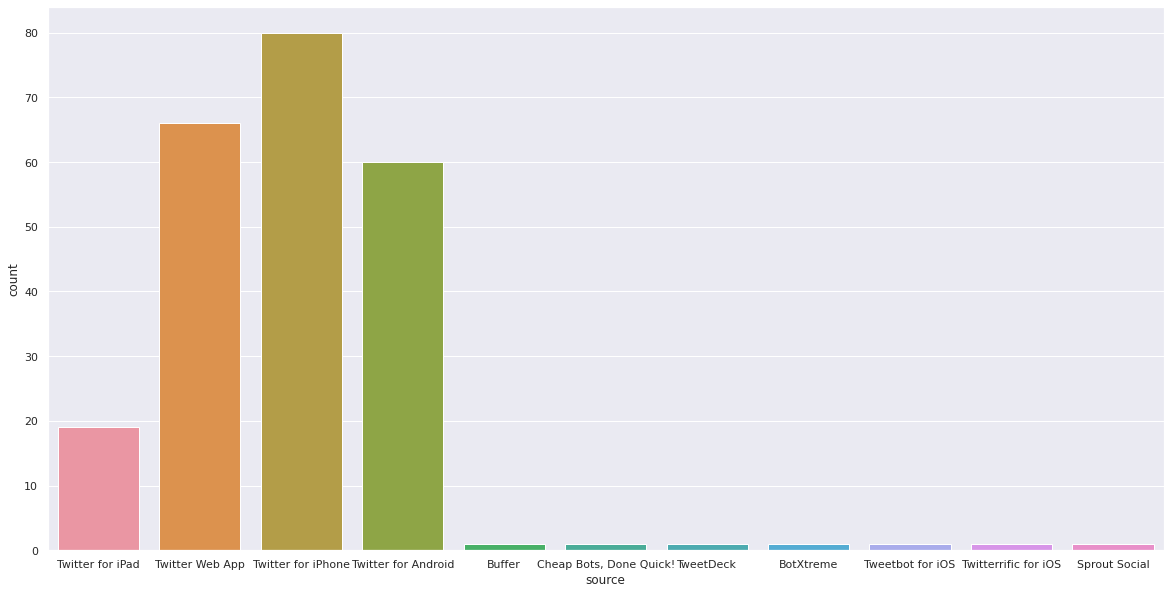

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="source", data=tweets)

# the most popular sources of Twitter are iphone, web app, and twitter for Android

# Word Cloud Visualization of All Tweets, Original Tweets, and Retweets

Visualization of top words of tweets and retweets.

In [ ]:
pandas_RT.head()

,tweet,"startswith(tweet, RT)"
0,RT @JoeBiden: The price of oil is down about 2...,True
1,@Jacob_Rees_Mogg I believe the price for gas i...,False
2,RT @Sbh08Mae: @RepKimSchrier knows gas &amp; o...,True
3,RT @JoeBiden: The price of oil is down about 2...,True
4,@RussianEmbassy @BBCRadio4 @mfa_russia @BBCWor...,False


In [ ]:
# define data cleaning function
import string
import re
#punctuation

def cleantext(text_column):
    #input format is pd['text']
    text_column=text_column.apply(lambda text:text.lower())
    text_column=text_column.apply((lambda text:re.sub(r"what's","what is ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"it's","it is ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"\'ve"," have ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"i'm","i am ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"\'re"," are ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"n't"," not ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"\'d"," would ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"\'s","s",text)))
    text_column=text_column.apply((lambda text:re.sub(r"\'ll"," will ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"can't"," cannot ",text)))
    text_column=text_column.apply((lambda text:re.sub(r" e g "," eg ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"e-mail","email",text)))
    text_column=text_column.apply((lambda text:re.sub(r"9\\/11"," 911 ",text)))
    text_column=text_column.apply((lambda text:re.sub(r" u.s"," american ",text)))
    text_column=text_column.apply((lambda text:re.sub(r" u.n"," united nations ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"\n"," ",text)))
    text_column=text_column.apply((lambda text:re.sub(r":"," ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"-"," ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"\_"," ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"\d+"," ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"[$#@%&*!~?%{}()]"," ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"/"," ",text)))
    text_column=text_column.apply((lambda text:re.sub(r"i’m", "i am ",text)))

    return text_column

In [ ]:
# text data cleaning
pandas_RT['clean_text']=cleantext(pandas_RT['tweet'])

In [ ]:
pandas_RT.head()

,tweet,"startswith(tweet, RT)",clean_text
0,RT @JoeBiden: The price of oil is down about 2...,True,rt joebiden the price of oil is down about ...
1,@Jacob_Rees_Mogg I believe the price for gas i...,False,jacob rees mogg i believe the price for gas i...
2,RT @Sbh08Mae: @RepKimSchrier knows gas &amp; o...,True,rt sbh mae repkimschrier knows gas amp; oi...
3,RT @JoeBiden: The price of oil is down about 2...,True,rt joebiden the price of oil is down about ...
4,@RussianEmbassy @BBCRadio4 @mfa_russia @BBCWor...,False,russianembassy bbcradio mfa russia bbcwor...


Remove stopwords

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
import gensim
from gensim.utils import simple_preprocess

from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
# This line adds self-defined stopwords
#stop_words.extend(['rt',"joebiden"])
stop_words.extend(['rt'])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def doc_to_words(docs):
    from nltk.tokenize import word_tokenize
    words=[]
    for doc in docs:
        word=word_tokenize(doc)
        words.append(word)
    return words

def remove_stopwords(articles):
    return [[word for word in simple_preprocess(str(article)) if word not in stop_words] for article in articles]


def lemmatization(nostop_texts):
    lemmatizer=WordNetLemmatizer()
    words_lemma=[]
    for sent in nostop_texts:
        sentence=[]
        for word in sent:
            word=lemmatizer.lemmatize(word)
            sentence.append(word)
        words_lemma.append(sentence)
    return words_lemma

In [ ]:
# preprocessing
clean_text=pandas_RT['clean_text']
words=doc_to_words(clean_text)
words_no_stop=remove_stopwords(words)
words_lemma=lemmatization(words_no_stop)
pandas_RT['tokens']=words_lemma

In [ ]:
pandas_RT.head()

,tweet,"startswith(tweet, RT)",clean_text,tokens
0,RT @JoeBiden: The price of oil is down about 2...,True,rt joebiden the price of oil is down about ...,"[joebiden, price, oil, since, mid, june, price..."
1,@Jacob_Rees_Mogg I believe the price for gas i...,False,jacob rees mogg i believe the price for gas i...,"[jacob, rees, mogg, believe, price, gas, contr..."
2,RT @Sbh08Mae: @RepKimSchrier knows gas &amp; o...,True,rt sbh mae repkimschrier knows gas amp; oi...,"[sbh, mae, repkimschrier, know, gas, amp, oil,..."
3,RT @JoeBiden: The price of oil is down about 2...,True,rt joebiden the price of oil is down about ...,"[joebiden, price, oil, since, mid, june, price..."
4,@RussianEmbassy @BBCRadio4 @mfa_russia @BBCWor...,False,russianembassy bbcradio mfa russia bbcwor...,"[russianembassy, bbcradio, mfa, russia, bbcwor..."


Read all tweets + retweets into a long string for word cloud visualiation: (1) create a clean list from cleaned tokens; (2) join the items of the list into a long string; (3) word cloud visualization.

In [ ]:
long_string=[]
for tweet in pandas_RT['tokens']:
  long_string.append(' '.join(tweet))

In [ ]:
long_string=' '.join(long_string)

In [ ]:
long_string[0:400]

'joebiden price oil since mid june price gas far fallen half much oil gas co jacob rees mogg believe price gas controlled ofgem global price set internationally big supplier like russia ofgem try reduce price company like shell sell north sea gas country willing pay price shell set right sbh mae repkimschrier know gas amp oil company making historic profit back wa amp america kim schrier helped joe'

Read all tweets into a long string for word cloud visualiation

In [ ]:
long_string_tweet=[]
rslt_df=pandas_RT.loc[pandas_RT['startswith(tweet, RT)']==False]
for tweet in rslt_df['tokens']:
  long_string_tweet.append(' '.join(tweet))
long_string_tweet=' '.join(long_string_tweet)

In [ ]:
long_string_tweet[0:400]

'jacob rees mogg believe price gas controlled ofgem global price set internationally big supplier like russia ofgem try reduce price company like shell sell north sea gas country willing pay price shell set right russianembassy bbcradio mfa russia bbcworld reesoxford ftworldnews theeconomist bloomberguk skynewsbiz rusmission eu politicoeurope eu closing russian oil gas understand end eu need russia'

Read all retweets into a long string for word cloud visualiation

In [ ]:
long_string_retweet=[]
rslt_df=pandas_RT.loc[pandas_RT['startswith(tweet, RT)']==True]
for tweet in rslt_df['tokens']:
  long_string_retweet.append(' '.join(tweet))
long_string_retweet=' '.join(long_string_retweet)

In [ ]:
long_string_retweet[0:400]

'joebiden price oil since mid june price gas far fallen half much oil gas co sbh mae repkimschrier know gas amp oil company making historic profit back wa amp america kim schrier helped joebiden price oil since mid june price gas far fallen half much oil gas co taykuy decrease price gas past month granted price still relatively high following incre joebiden price oil since mid june price gas far fa'

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Word cloud of tweets+retweets

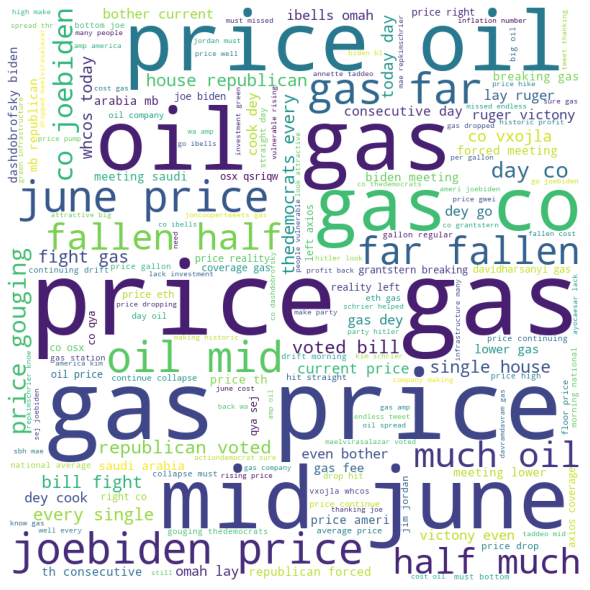

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(long_string)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Word cloud of original tweets

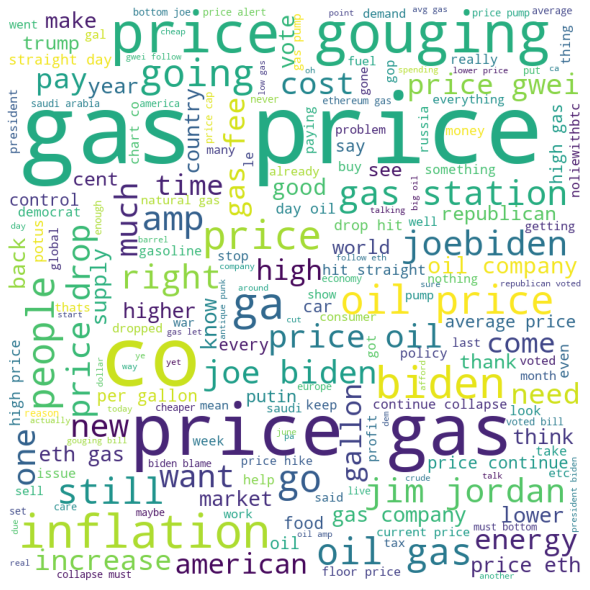

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(long_string_tweet)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Word cloud of retweets

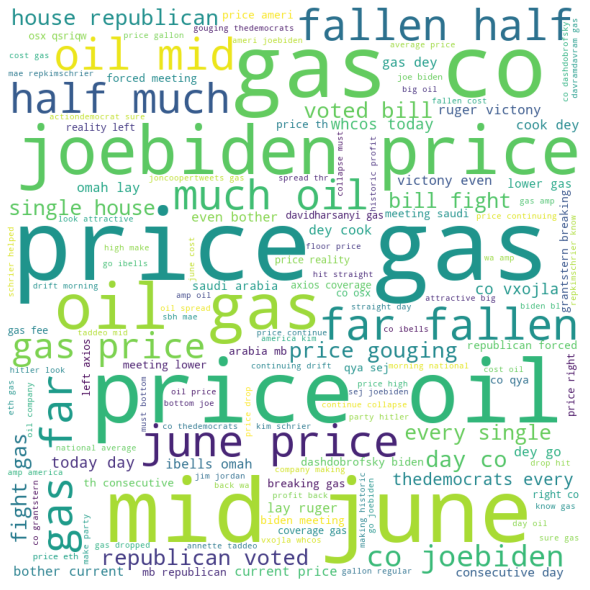

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(long_string_retweet)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()